In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_4578167.csv')

df2 = pd.read_csv('MensNationalTeamRankings - Sheet1.csv')

df3 = pd.read_csv('WomensNationalTeamRankings - Sheet1.csv')

In [3]:
df = pd.merge(df2, df3, on ='Country Name')

In [4]:
df.head()

,Mens Rank,Country Name,Mens Points,Womens Rank,Womens Points
0,66,Albania,1361.81,71,1346.01
1,41,Algeria,1480.59,79,1288.27
2,188,American Samoa,900.27,144,1030.00
3,152,Andorra,1028.70,177,751.46
4,120,Angola,1149.08,141,1041.91


In [5]:
df = df.dropna()

In [6]:
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,35513.081190,34632.951650,36830.156610,36782.227120,37314.564390,37587.065940,38893.960560,40143.000270,39834.223900,31182.833880
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3323.273413,3237.872226,3365.684322,3503.826534,3533.336591,3627.474284,3670.891196,3761.035160,3814.846625,3659.272868
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1699.488110,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.392197,2152.190243,2078.479082
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3675.392441,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.321093,4335.409188,4241.522499
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6710.750725,7412.967137,7682.475646,8179.297828,7337.569901,7103.226249,7310.896551,7148.933253,6995.299736,6478.332182


In [7]:
df1 = df1[['Country Name', '2020']]

In [8]:
df = pd.merge(df, df1, on='Country Name')

In [9]:
print(df.to_string())

     Mens Rank                    Country Name  Mens Points  Womens Rank  Womens Points           2020
0           66                         Albania      1361.81           71        1346.01   13632.186540
1           41                         Algeria      1480.59           79        1288.27   11323.312220
2          188                  American Samoa       900.27          144        1030.00            NaN
3          152                         Andorra      1028.70          177         751.46            NaN
4          120                          Angola      1149.08          141        1041.91    6478.332182
5          132             Antigua and Barbuda      1117.01          172         804.42   18240.380410
6            3                       Argentina      1770.65           31        1660.37   20769.032380
7           92                         Armenia      1242.42          139        1072.97   13311.028140
8          202                           Aruba       855.37          180 

In [10]:
df = df.dropna()

In [11]:
df['%Diff'] = ((df['Mens Points']-df['Womens Points'])/df['Mens Points'])*100

In [12]:
df.head()

,Mens Rank,Country Name,Mens Points,Womens Rank,Womens Points,2020,%Diff
0,66,Albania,1361.81,71,1346.01,13632.186540,1.160221
1,41,Algeria,1480.59,79,1288.27,11323.312220,12.989416
4,120,Angola,1149.08,141,1041.91,6478.332182,9.326592
5,132,Antigua and Barbuda,1117.01,172,804.42,18240.380410,27.984530
6,3,Argentina,1770.65,31,1660.37,20769.032380,6.228221


In [13]:
df.to_csv('GDPPercentD.csv', index = False)

In [13]:
import seaborn as sns 

plt.style.use('seaborn-whitegrid')

C:\Users\vikra\AppData\Local\Temp\ipykernel_14824\2866191402.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


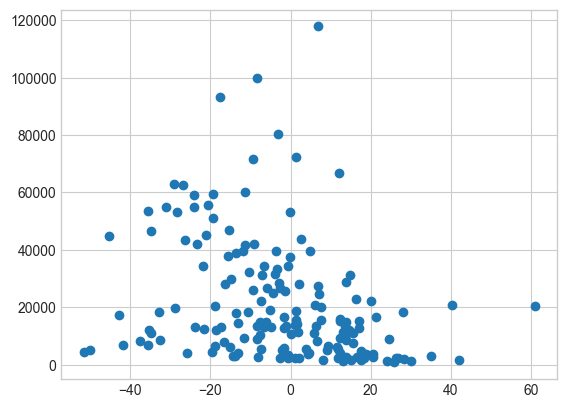

In [14]:
plt.scatter(df['%Diff'], df['2020'])

In [18]:
X = df['%Diff'].values[:, np.newaxis]

y = df['2020'].values

In [19]:
import statsmodels.api as sm


x2 = sm.add_constant(X)

model = sm.OLS(y, x2).fit()
predictions = model.predict(x2)



model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     15.45
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000125
Time:                        12:56:04   Log-Likelihood:                -1859.3
No. Observations:                 164   AIC:                             3723.
Df Residuals:                     162   BIC:                             3729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.079e+04   1609.502     12.915      0.000    1.76e+04     2.4e+04
x1          -329.2897     83.775     -3.931      0.000    -494.722    -163.858
==============================================================================
Omnibus:                       67.297   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.932
Skew:                           1.680   Prob(JB):                     1.05e-43
Kurtosis:                       7.205   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

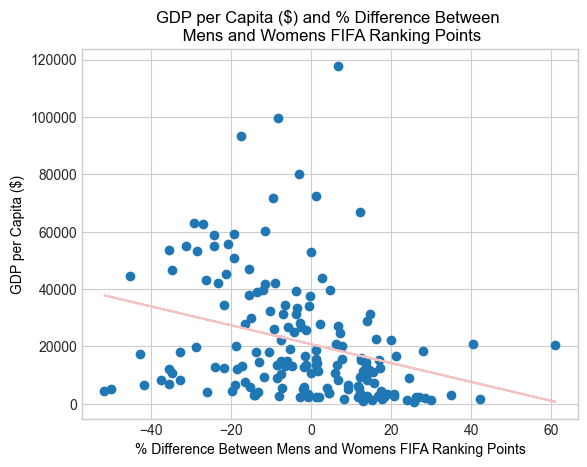

In [25]:
ax = plt.scatter(X,y)


plt.title('GDP per Capita ($) and % Difference Between \n Mens and Womens FIFA Ranking Points', color= 'black')
plt.xlabel('% Difference Between Mens and Womens FIFA Ranking Points', color= 'black')
plt.ylabel('GDP per Capita ($)', color = 'black')
plt.plot(X, predictions, color = '#f4c2c2')

ax.figure.savefig('GDPPercent2.png', dpi = 1000)

In [18]:
Xm = df['Mens Points'].values[:, np.newaxis]

y = df['2020'].values

In [19]:
import statsmodels.api as sm


xm2 = sm.add_constant(Xm)

model = sm.OLS(y, xm2).fit()
predictions = model.predict(xm2)



model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     11.37
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000946
Time:                        12:33:36   Log-Likelihood:                -1746.3
No. Observations:                 154   AIC:                             3497.
Df Residuals:                     152   BIC:                             3503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7490.6631   8696.755     -0.861      0.390   -2.47e+04    9691.462
x1            22.8854      6.787      3.372      0.001       9.477      36.294
==============================================================================
Omnibus:                       76.151   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.036
Skew:                           1.961   Prob(JB):                     1.26e-57
Kurtosis:                       8.045   Cond. No.                     6.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
Xw = df['Womens Points'].values[:, np.newaxis]

y = df['2020'].values

In [21]:
import statsmodels.api as sm


xw2 = sm.add_constant(Xw)

model = sm.OLS(y, xw2).fit()
predictions = model.predict(xw2)



model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     31.77
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           8.22e-08
Time:                        12:33:37   Log-Likelihood:                -1737.2
No. Observations:                 154   AIC:                             3478.
Df Residuals:                     152   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.189e+04   6091.595     -1.952      0.053   -2.39e+04     143.014
x1            25.8724      4.590      5.636      0.000      16.803      34.942
==============================================================================
Omnibus:                       92.113   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.698
Skew:                           2.254   Prob(JB):                    2.48e-100
Kurtosis:                      10.153   Cond. No.                     5.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

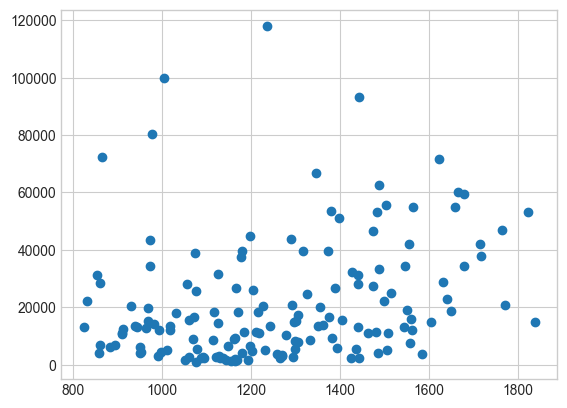

In [22]:
plt.scatter(df['Mens Points'], df['2020'])

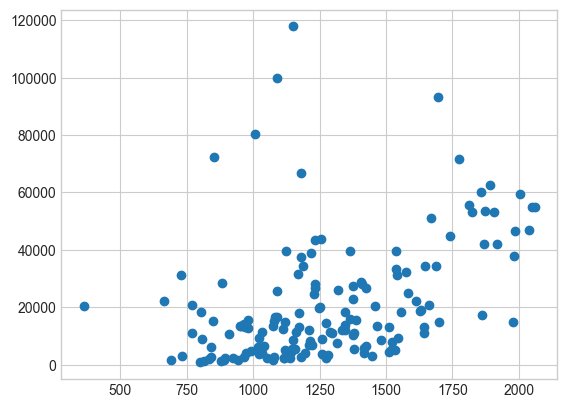

In [23]:
plt.scatter(df['Womens Points'], df['2020'])